In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
def get_data(filename, columns):
    """
    Params : 
        dataset_file : string
                        File as mentioned in the cli interface
    Returns :
        data : pandas dataframe
                data loaded from the dataset_file
    """
    df=pd.read_csv(filename)
    df=df[columns]
#     df[columns[2]] = df[columns[2]].str.replace('$', '')
#     df[columns[2]] = df[columns[2]].str.replace(',', '')
#     df= df.astype(float)
    return df

def preprocess_df(df):
    """
    Params :
        df : Pandas dataframe
            Data
    Returns : 
        df : Pandas dataframe
            Drop rows with empty columns and standardize data
    """
#     df[columns] = df[columns].replace(0, np.nan)
    df=df.dropna()
#     normalized_df=(df-df.mean())/df.std()
#     return normalized_df
    return df

def plot_score(df):
    """
    Params :
        df : Pandas dataframe
            Data
    """    
    print("Data ranges from min",df['Score'].min()," to max",df['Score'].max())
    x=[i for i in range(df.shape[0])]
    plt.scatter(df['Score'],x)
    plt.show()
    
def get_word_counts(df):
    counts=[]
    for sentence in df['Text'].values:
        counts.append(len(sentence.split()))
    return counts

def plot_word_counts(data):
    keys=[]
    values=[]
    maxx=0
    minn=-1
    key_max=-1
    count_dict=collections.Counter(data)
    for key in count_dict:
        keys.append(key)
        values.append(count_dict[key])
        if(count_dict[key]>maxx):
            maxx=count_dict[key]
            key_max=key
        if(minn==-1 or count_dict[key]<minn):
            minn=count_dict[key]
    print("Most reviews have",key_max,"number of words")
#     print("Minimum frequency of words in a review", minn)
    print("Maximum number of words in a review", np.max(keys))
    print("Minimum number of words in a review", np.min(values))
    plt.figure(figsize=(10,10))
    plt.title("Word Freq Graph")
    plt.xlabel("Number of words in a review", fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.scatter(keys,values)
    plt.show()

In [3]:
data_path='data/'
columns=['Id','Score','Text']
df=get_data(data_path+'train.csv',columns)

In [4]:
print("Shape of dataframe before processing",df.shape)
df.head()

Shape of dataframe before processing (1697533, 3)


,Id,Score,Text
0,0,4.0,This is a charming version of the classic Dick...
1,1,3.0,It was good but not as emotionally moving as t...
2,2,3.0,"Don't get me wrong, Winkler is a wonderful cha..."
3,3,5.0,Henry Winkler is very good in this twist on th...
4,4,4.0,This is one of the best Scrooge movies out. H...


In [5]:
df_original=df
df=preprocess_df(df)
print("Shape of dataframe after preprocssing",df.shape)

Shape of dataframe after preprocssing (1397480, 3)


In [6]:
# for sake of simplicity 
df_train=df[:10000]
df_test=df[10000:15000]

# Now we should
1. Check range of scores - regression or classification
2. Check if text values are null

In [7]:
# Plot vis of df scores 

Data ranges from min 1.0  to max 5.0


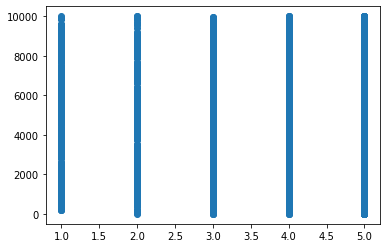

In [9]:
plot_score(df_train)

Most reviews have 21 number of words
Maximum number of words in a review 2911
Minimum number of words in a review 1


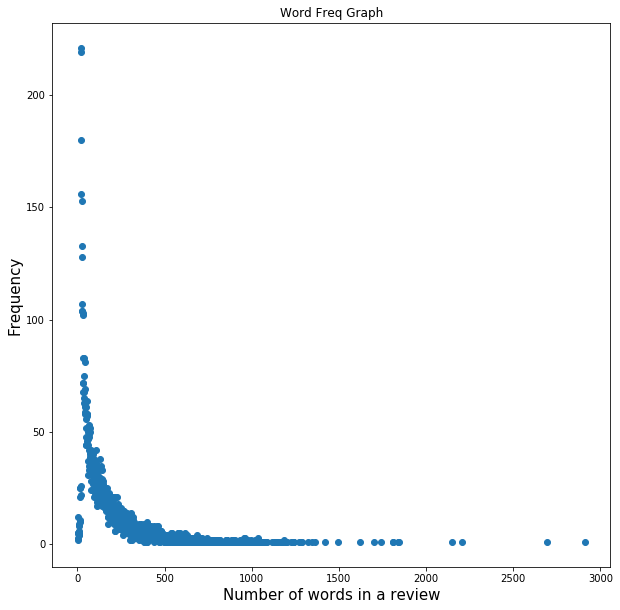

In [10]:
word_counts=get_word_counts(df_train)
plot_word_counts(word_counts)

## Now we do it as a classification task

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df_train['Text'])
X = vectorizer.transform(df_train['Text'])

In [12]:
# del X
# del vectorizer

In [14]:
# from sklearn.svm import SVC
# clf = SVC(gamma='auto')
# clf.fit(X, df['Score']) 

from sklearn.svm import LinearSVC
# from sklearn.datasets import make_classification
# X, y = make_classification(n_features=4, random_state=0)
# clf = LinearSVC(random_state=0, tol=1e-5)
clf = LinearSVC(dual=False,penalty='l1')
clf.fit(X, df_train['Score'])  

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [15]:
# df_test=get_data(data_path+"test.csv",['Id'])
# df_test = df_test.merge(df_original, on='Id', how = 'inner')
# df_test = df_test[['Id','Text']]
# df_test=df_test.fillna('')
print(df_test.shape)

(5000, 3)


In [18]:
def accuracy(predictions,y_true):
    return np.sum(predictions==y_true)/len(y_true)

In [19]:
predictions=clf.predict(vectorizer.transform(df_test['Text']))
print(accuracy(predictions,df_test['Score']))

0.586


In [17]:
# submission = pd.DataFrame({'Id':df_test['Id'],'Score':predictions})
# filename = 'submission.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)

Work flow
1. Remove stop words
2. Lemmatization
3. Tfidf
4. Run Regression models -SVC, linear regression

Or clustering and assigning ratings to cluster

Decision tree binning

SVM binning